In [62]:
#Import the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

### Question One
Daily energy intake in kJ was measured for 11 women (Altman, 1991):
5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770.
We wish to investigate whether the women’s energy intake deviates
systematically from a recommended value of 7725 kJ. Assuming this
data comes from a normal distribution; use a t-test to test whether the
distribution might have a mean of 7725 kJ. Explain whether a left-tail,
right-tail or two-tailed test is appropriate. Give the sample mean, sample
standard deviation, standard error of the mean (SEM), t statistic, degrees
of freedom and p-value. Finally explain if the null hypothesis is rejected
or not.

In [2]:
#Load the daily intake data into a list and convert it to a numpy array
daily_intake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
#Get the size pf the dataset
sample_size = np.size(daily_intake)

In [3]:
#Set the recommended mean value
recommended_mean = 7725
#Use the scipy ttest_1samp function to perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(daily_intake, recommended_mean)

#Compute the mean of the daily intake data
sample_mean = round(np.mean(daily_intake), 2)

#Compute the standard deviation of the daily intake data
sd = round(np.std(daily_intake), 2)

#Compute the standard error of the daily intake data
sem_val = np.std(daily_intake, ddof=1) / np.sqrt(np.size(daily_intake))
sem = round(sem_val, 2)

#Round off the t-statistic
t_stat = (round(t_statistic, 3))

#Round off the p-value
p_val = (round(p_value, 3))

#Compute the degrees of freedom
df = sample_size - 1

table = [["Mean", sample_mean],["Standard Deviation",sd],["Sample Standard error of mean",sem],
         ["Degrees of Freedom",df],["T-Statistic",t_stat],["P-Value",p_val]]
print(tabulate(table, headers=["Statistic", "Value"]))

Statistic                         Value
-----------------------------  --------
Mean                           6753.64
Standard Deviation             1088.97
Sample Standard error of mean   344.36
Degrees of Freedom               10
T-Statistic                      -2.821
P-Value                           0.018


**Setting the null and alternative hypotheses:**

H0 (Null Hypothesis): μ = 7725 kJ

HA (Alternative Hypothesis): μ ≠ 7725 kJ

**Stating the significance level:**

α = 0.05

**Determining the appropriate test type (left-tail, right-tail or two-tailed test)**

A two-tailed test is appropriate because our alternative hypothesis is testing whether the mean of the sample data provided will not be equal to the recommended mean of 7725 kJ. The mean we compute could be less than or greater than the recommended mean

**Conclusion**

The p-value of the data provided is 0.018, which is less than our significance level of 0.05 therefore the null hypothesis is rejected

### Question Two 
 A Guinness Overall Enjoyment Score (GOES) was used to test if Guinness served in an Irish pub tastes significantly better than pints served elsewhere around the globe. Pints consumed in Ireland received a mean GOES score of 74, while the average GOES score for Guinness tasted elsewhere was 57. The full results were as follows:

    Location Sample Size Mean Standard Deviation
    Ireland 42 74 7.4
    Elsewhere 61 57 7.1
    
Is this difference of 74 versus 57 significant, or is it simply due to natural, random variation? Use a t-test and explain whether a one-sample, two-sample or paired test is appropriate. Show the steps of calculating the t statistic and explain whether a left-tailed, right-tailed or two-tailed test is required. Give the resulting p-value.

**Calulating the degree of freedom**

In [4]:
#Calculating the degree of freedom using the formula df = n1 + n2 – 2.
df_guiness = 42 + 61 - 2

**Calculating the degree of freedom and t-statistic**

In [5]:
#Calculating the t-value using the scipy ttest_ind_from_stats() function
guinness_t_statistic, guinness_p_value = stats.ttest_ind_from_stats(mean1 = 74, std1 = 7.4, nobs1 = 42, 
                                                                    mean2 = 57, std2 = 7.1, nobs2 = 61)

#Print the result
g_table = [["Degrees of Freedom",df_guiness],["T-Statistic",guinness_t_statistic],["P-Value",guinness_p_value]]
print(tabulate(g_table, headers=["Statistic", "Value"]))

Statistic                   Value
------------------  -------------
Degrees of Freedom  101
T-Statistic          11.7378
P-Value               1.39595e-20


**Setting the null and alternative hypotheses:**

H0 (Null Hypothesis): μ = 74

HA (Alternative Hypothesis): μ > 74

**Stating the significance level:**

α = 0.05

**Determining the approriate test type (one-sample, two-sample or paired test)**

A two-sample test is appropriate because we will be comparing two datasets randomly sampled from two normal populations, i.e.,  if Guinness served in an Irish pub tastes significantly better than pints served elsewhere around the globe  

**Determining the approriate test type (left-tail, right-tail or two-tailed test)**

A right-tailed test is appropriate because our alternative hypothesis is testing whether the mean GOES score from anywhere else in the globe will be greater than that of the GOES score in Ireland

**Conclusion**

### Question Three

Use data from the World Bank Indicators for 2013 to study the relationship between Fertility rate, total (births per woman) versus GDP per capita PPP (current international $). Make a carefully labelled graph with one dot per country. Estimate the correlation coefficient and give your interpretation.

In [6]:
#Load the Fertlity Rate and GDP per Capita data from the dowloaded files
fertility_data = pd.read_csv('Fertility_Rate_Data.csv', skiprows=4)
gdp_data = pd.read_csv('GDP_Per_Capita_PPP.csv', skiprows = 4)

In [7]:
#Load the fertility rate data from 2013 into a separate new dataframe
fertility_data_filtered = fertility_data[["2013"]]
#Load the GDP per Capita data from 2013 into a separate new dataframe
gdp_data_filtered = gdp_data[["2013"]]

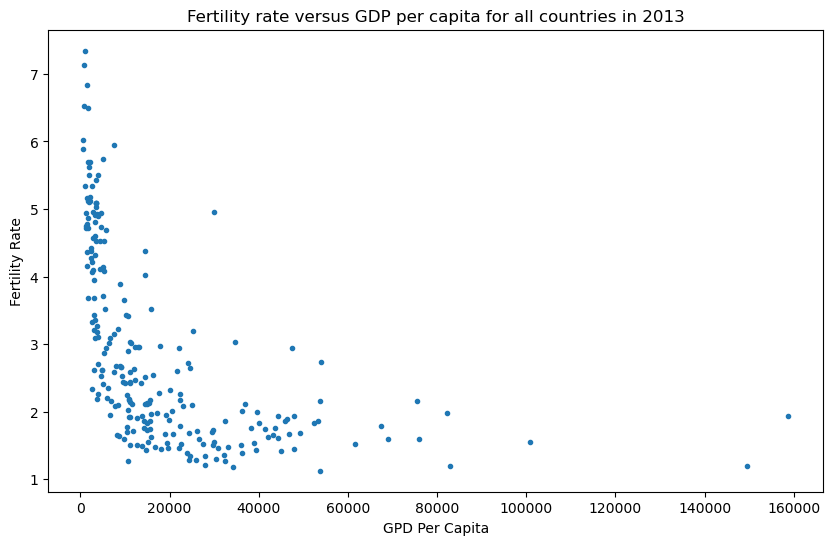

In [61]:
#Plot a scatterplot of Fertility rate versus GDP per capita for all countries in 2010
plt.figure(figsize = (10,6))
plt.title("Fertility rate versus GDP per capita for all countries in 2013")
plt.xlabel("GPD Per Capita")
plt.ylabel("Fertility Rate")
plt.scatter(gdp_data_filtered['2013'], fertility_data_filtered['2013'], marker = ".")
plt.show()

In [9]:
#Calculate the correlation coefficient between the two datasets

coefficient = fertility_data['2013'].corr(gdp_data['2013'])
print(f"Correlation co-effecient : {coefficient}")

Correlation co-effecient : -0.5150224579151862


#### Question Four

Load in monthly average house price data in pounds sterling (£) from Jan 1991 to Dec 2016. Download the data from here (choose the file UK monthly indices (Post ‘91)). Graph the time series and label it carefully. Construct the autocorrelation function (ACF) of the monthly returns defined as r(t) = [p(t)/p(t-1)]-1 and show the values for lags of one up to 20 using a bar-graph. Indicate the values of the ACF using horizontal lines that would correspond to a statistically significant result at p<0.05.
From the ACF of monthly data is there evidence of seasonality? Is there a trend in the time series? What is the annualized return over this period as a percentage?

In [35]:
#Load the housing price data data and metadata from the dowloaded files
house_price_data = pd.read_excel('Monthly Average House Price.xls')
house_prices = house_price_data.rename(columns={"Unnamed: 0":"Date"})

In [36]:
#Set the Date column as the index
house_prices = house_prices.set_index('Date')

In [38]:
#Select the data from Jan 1991 to Dec 2016
mask = (house_prices.index>='1991-01-01') & (house_prices.index<='2016-12-31')
house_prices_filtered = house_prices.loc[mask]

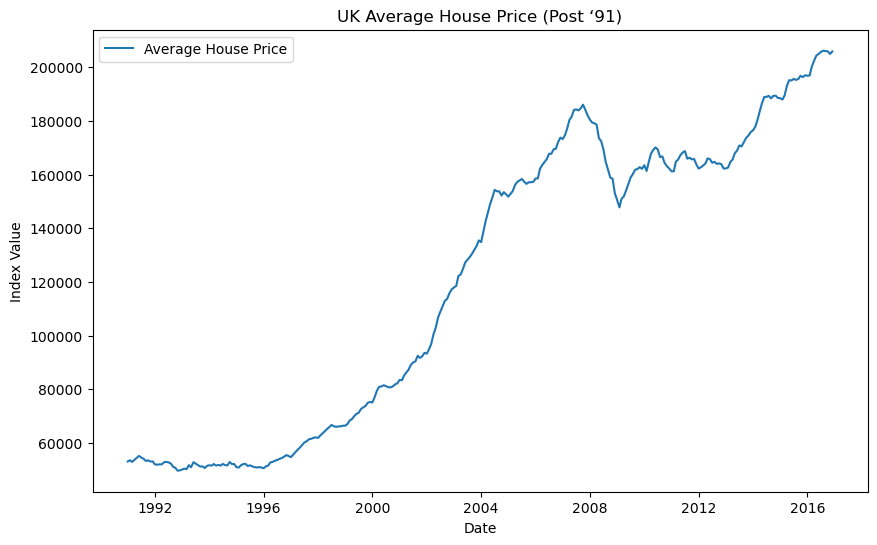

In [39]:
#Plot a time-series of the UK monthly indices (Post ‘91)
plt.figure(figsize = (10,6))
plt.title("UK Average House Price (Post ‘91)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.plot(house_prices_filtered.index, house_prices_filtered["Average House Price"], label="Average House Price")
plt.legend(loc='upper left')
plt.show()

In [40]:
#Calculate the monthly returns on Average House Price defined as r(t) = [p(t)/p(t-1)]-1
house_prices_returns = house_prices_filtered.copy()
house_prices_returns["Returns"] = (house_prices_filtered["Average House Price"] / house_prices_filtered["Average House Price"].shift(1)) -1

In [41]:
house_prices_returns.head()

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months,Returns
Date,,,,,,,
1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN,NaN
1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN,0.008390
1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN,-0.011289
1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN,0.014833
1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN,0.013195


In [42]:
#Create a list to hold the ACF data from lag values 1 to 20
acf_data = []
#Constructing the autocorrelation function (ACF) of the monthly returns
for i in range(1, 21):
    acf = round(house_prices_returns["Returns"].autocorr(lag=i), 3)
    acf_data.append(acf)

In [43]:
#Find the values of the ACF at p<0.05 by using horizontal lines using the confidence interval formula  ±1.96 / sqrt(n)

#Find the confidence interval
interval = 1.96 / np.sqrt(np.size(house_prices_returns["Returns"]))

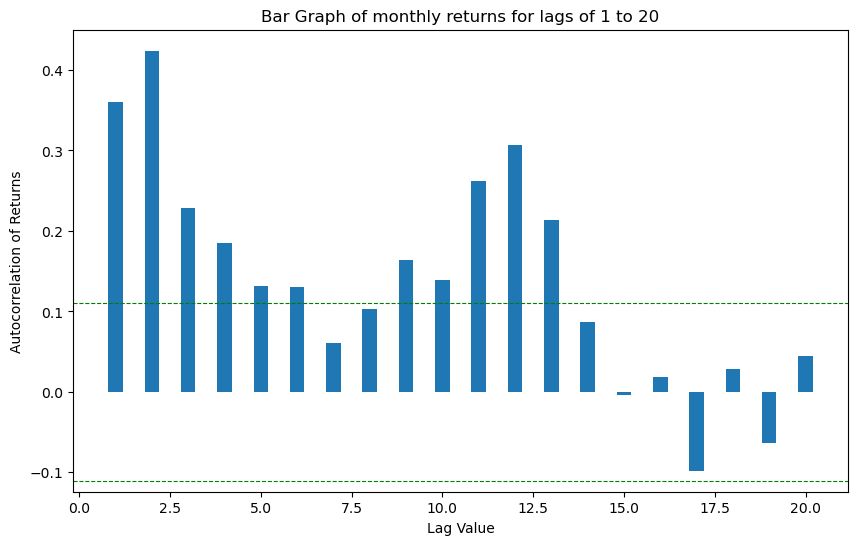

In [44]:
#Plot the bar graph
plt.figure(figsize = (10,6))
plt.title("Bar Graph of monthly returns for lags of 1 to 20")
plt.xlabel("Lag Value")
plt.ylabel("Autocorrelation of Returns")
plt.bar(range(1, 21), acf_data,width = 0.4)
plt.axhline(interval, color = 'g', linestyle="--", linewidth = 0.8)
plt.axhline(np.negative(interval), color = 'g', linestyle="--", linewidth = 0.8)
plt.show()

In [156]:
#Calculating the annualized returns

#Get initial value of investment
initial_house_inv = house_prices_returns.iloc[0]["Average House Price"]

#Get final value of investment
final_house_inv = house_prices_returns.iloc[len(house_prices_returns) -1]["Average House Price"]

#Find number of years
n = 2016 - 1991 + 1

#Get annualized returns
annualized_return = np.power(final_house_inv / initial_house_inv, 1/n) - 1
annualized_return_pct = round(annualized_return * 100, 2)

print(f"Annualized Returns : {annualized_return_pct}%")

Annualized Returns : 5.35%


### Question 5

Load in the FTSE100 index from here (ticker = ^FTSE) over the same period (01-Jan-1991 to 31-Dec-2016). Plot the cumulative returns from the House market (using the price data from question 4) and the FTSE100 index on the same graph with the time series normalized such that each starts at 100 in Jan-1991. What is the average annualized return from the FTSE100? Would it have been better to invest in a UK house or the UK stock market over this period?

In [45]:
#Load the FTSE100 index from the dowloaded files
ftse = pd.read_csv('FTSE100.csv')

In [98]:
#Select the Date and Adj Close columns from the main dataset
ftse_trim = pd.DataFrame(ftse[["Date","Adj Close"]])
#Convert the Date column to a datetime formart
ftse_trim["Date"] = pd.to_datetime(ftse_trim["Date"])
#Set the Date column as the index
ftse_trim = ftse_trim.set_index('Date')
#Sort the dataset by the date
ftse_trim_sorted = ftse_trim.sort_index()
ftse_trim_sorted["Returns"] = (ftse_trim_sorted["Adj Close"] / ftse_trim_sorted["Adj Close"].shift(1)) -1

ftse_trim_sorted.head()

,Adj Close,Returns
Date,,
1991-01-01,2170.300049,NaN
1991-02-01,2380.899902,0.097037
1991-03-01,2456.500000,0.031753
1991-04-01,2486.199951,0.012090
1991-05-01,2499.500000,0.005350


In [47]:
#Find the cummulutive sum of the FTSE data
ftse_trim_sorted["Cummulative Returns"] = ftse_trim_sorted["Returns"].cumsum()
ftse_trim_sorted.head()

,Adj Close,Returns,Cummulative Returns
Date,,,
1991-01-01,2170.300049,NaN,NaN
1991-02-01,2380.899902,0.097037,0.097037
1991-03-01,2456.500000,0.031753,0.128790
1991-04-01,2486.199951,0.012090,0.140880
1991-05-01,2499.500000,0.005350,0.146230


In [52]:
#Select the index value from the FTSE dataset
ftse_returns_index = ftse_trim_sorted.iloc[1]["Cummulative Returns"]
ftse_trim_sorted["Normal Returns"] = (ftse_trim_sorted["Cummulative Returns"]/ftse_returns_index) * 100
ftse_trim_sorted_plot = pd.DataFrame(ftse_trim_sorted["Normal Returns"])
ftse_trim_sorted_plot.head()

,Normal Returns
Date,
1991-01-01,NaN
1991-02-01,100.000000
1991-03-01,132.722233
1991-04-01,145.181735
1991-05-01,150.694620


In [56]:
#Find the cummulutive sum of the house price data
house_prices_returns["Cummulative Returns"] = house_prices_returns["Returns"].cumsum()

#Select the index value from each dataset
house_returns_index = house_prices_returns.iloc[1]["Cummulative Returns"]
house_prices_returns["Normal Returns"] = (house_prices_returns["Cummulative Returns"]/house_returns_index) * 100

house_prices_returns_plot = pd.DataFrame(house_prices_returns["Normal Returns"])
house_prices_returns_plot.head()

,Normal Returns
Date,
1991-01-01,NaN
1991-02-01,100.000000
1991-03-01,-34.563615
1991-04-01,142.243755
1991-05-01,299.527543


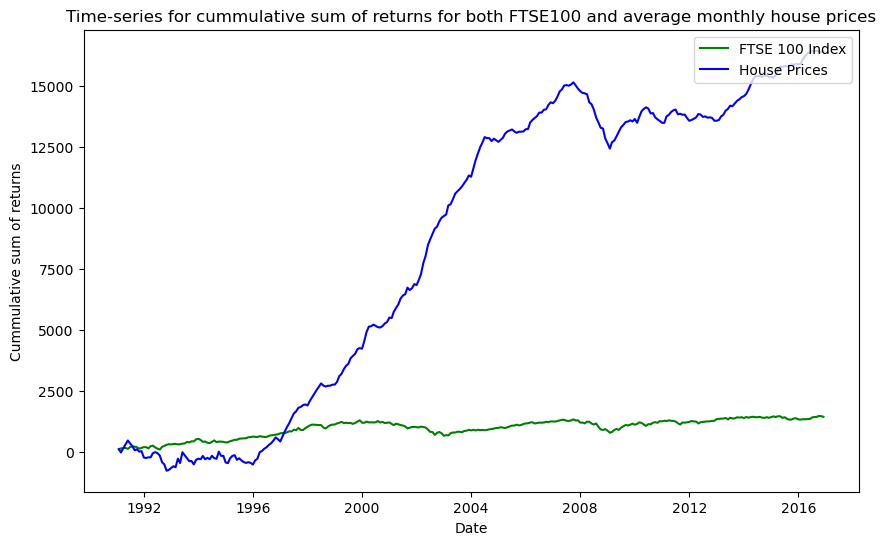

In [57]:
#Plot the time series for cumulative sum of returns for both FTSE100 and average monthly house prices
plt.figure(figsize = (10,6))
plt.title("Time-series for cummulative sum of returns for both FTSE100 and average monthly house prices")
plt.xlabel("Date")
plt.ylabel("Cummulative sum of returns")
plt.plot(ftse_trim_sorted_plot, label = "FTSE 100 Index", color='g')
plt.plot(house_prices_returns_plot, label = "House Prices", color='b')
plt.legend(loc="upper right")
plt.show()

In [157]:
#Calculating the annualized returns

#Get initial value of investment
initial_ftse_inv = ftse_trim_sorted.iloc[0]["Adj Close"]

#Get final value of investment
final_ftse_inv = ftse_trim_sorted.iloc[len(ftse_trim_sorted) -1]["Adj Close"]

#Find number of years
n_ftse = 2016 - 1991 + 1

#Get annualized returns
annualized_return_ftse = np.power(final_ftse_inv / initial_ftse_inv, 1/n_ftse) - 1
annualized_return_ftse_pct = round(annualized_return_ftse * 100, 2)

print(f"Annualized Returns : {annualized_return_ftse_pct}%")

Annualized Returns : 4.46%
